In [231]:
import pydotplus
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [232]:
def read_data(y_col=['class'], drop_cols=['class', 'animal', 'type']):
    data = pd.read_csv('p2_zoo.csv')
    y = data[y_col]
    x = data.drop(columns=drop_cols)
    return x, y

# to understand what values are in each column
test = pd.read_csv('p2_zoo.csv')
for col in test.columns:
    print(col, test[col].unique())

animal ['aardvark' 'antelope' 'bass' 'bear' 'boar' 'buffalo' 'calf' 'carp'
 'catfish' 'cavy' 'cheetah' 'chicken' 'chub' 'clam' 'crab' 'crayfish'
 'crow' 'deer' 'dogfish' 'dolphin' 'dove' 'duck' 'elephant' 'flamingo'
 'flea' 'frog' 'fruitbat' 'giraffe' 'girl' 'gnat' 'goat' 'gorilla' 'gull'
 'haddock' 'hamster' 'hare' 'hawk' 'herring' 'honeybee' 'housefly' 'kiwi'
 'ladybird' 'lark' 'leopard' 'lion' 'lobster' 'lynx' 'mink' 'mole'
 'mongoose' 'moth' 'newt' 'octopus' 'opossum' 'oryx' 'ostrich' 'parakeet'
 'penguin' 'pheasant' 'pike' 'piranha' 'pitviper' 'platypus' 'polecat'
 'pony' 'porpoise' 'puma' 'pussycat' 'raccoon' 'reindeer' 'rhea'
 'scorpion' 'seahorse' 'seal' 'sealion' 'seasnake' 'seawasp' 'skimmer'
 'skua' 'slowworm' 'slug' 'sole' 'sparrow' 'squirrel' 'starfish'
 'stingray' 'swan' 'termite' 'toad' 'tortoise' 'tuatara' 'tuna' 'vampire'
 'vole' 'vulture' 'wallaby' 'wasp' 'wolf' 'worm' 'wren']
hair [1 0]
feathers [0 1]
eggs [0 1]
milk [1 0]
airborne [0 1]
aquatic [0 1]
predator [1 0]


In [172]:
X, Y = read_data()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y['class'], test_size=0.2, random_state=1)


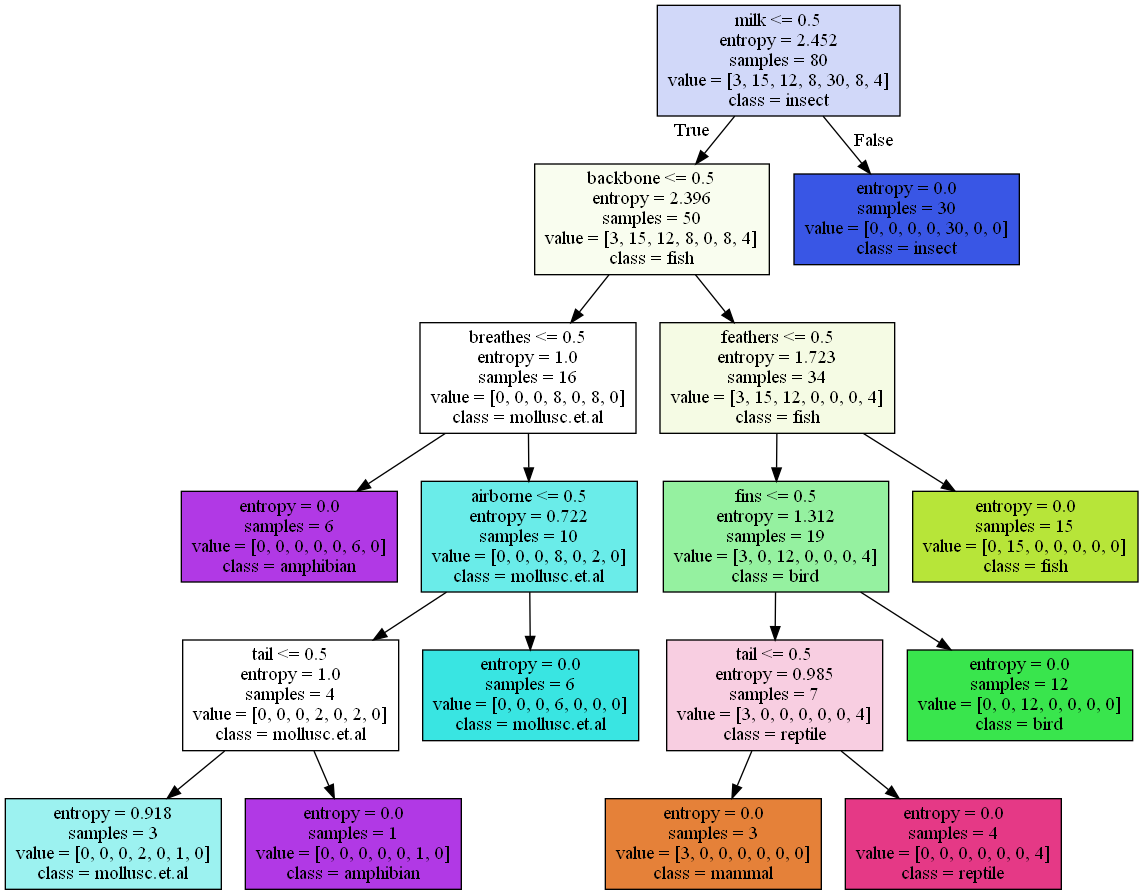

In [173]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
clf = clf.fit(X_train, Y_train)

import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=Y['class'].unique(), filled=True, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [174]:
predY = clf.predict(X_test)
predictions = pd.concat([Y_test.reset_index(drop=True), pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,class,Predicted Class
0,mammal,mammal
1,bird,bird
2,mammal,mammal
3,bird,bird
4,mammal,mammal
5,mollusc.et.al,mollusc.et.al
6,mammal,mammal
7,bird,bird
8,fish,fish
9,amphibian,reptile


In [175]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(Y_test, predY)))

Accuracy on test data is 0.90


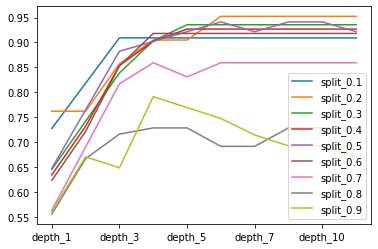

             Depth  Accuracy
split_0.1  depth_3  0.909091
split_0.2  depth_6  0.952381
split_0.3  depth_5  0.935484
split_0.4  depth_5  0.926829
split_0.5  depth_6  0.941176
split_0.6  depth_4  0.918033
split_0.7  depth_4  0.859155
split_0.8  depth_4  0.728395
split_0.9  depth_4  0.791209


,split_0.1,split_0.2,split_0.3,split_0.4,split_0.5,split_0.6,split_0.7,split_0.8,split_0.9
depth_1,0.727273,0.761905,0.645161,0.634146,0.647059,0.622951,0.563380,0.555556,0.560440
depth_2,0.818182,0.761905,0.741935,0.731707,0.764706,0.721311,0.690141,0.666667,0.670330
depth_3,0.909091,0.857143,0.838710,0.853659,0.882353,0.852459,0.816901,0.716049,0.648352
depth_4,0.909091,0.904762,0.903226,0.902439,0.901961,0.918033,0.859155,0.728395,0.791209
depth_5,0.909091,0.904762,0.935484,0.926829,0.921569,0.918033,0.830986,0.728395,0.769231
depth_6,0.909091,0.952381,0.935484,0.926829,0.941176,0.918033,0.859155,0.691358,0.747253
depth_7,0.909091,0.952381,0.935484,0.926829,0.921569,0.918033,0.859155,0.691358,0.714286
depth_8,0.909091,0.952381,0.935484,0.926829,0.941176,0.918033,0.859155,0.728395,0.692308
depth_10,0.909091,0.952381,0.935484,0.926829,0.941176,0.918033,0.859155,0.728395,0.692308
depth_None,0.909091,0.952381,0.935484,0.926829,0.921569,0.918033,0.859155,0.728395,0.670330


In [176]:
X, Y = read_data() #make sure x and y are clean 

depths = [1,2,3,4,5,6,7,8,10,None] #various training depths to test
training_splits = [i/100 for i in range(10,91,10)] #difference training splits to test

test = {'split_{}'.format(i):{} for i in training_splits} # initialize a dictionary for each split

for split in training_splits:
    # split the data with a split from the test cases
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y['class'], test_size=split, random_state=1)
    
    for depth in depths:
        # test that split with different depths and store the accuracy in the dictionary 
        clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=depth)
        clf = clf.fit(X_train, Y_train)
        predY = clf.predict(X_test)
        test['split_{}'.format(split)]['depth_{}'.format(depth)] = (accuracy_score(Y_test, predY))

# convert the dict to a dataframe for ease of use 
out = pd.DataFrame(test)

out.plot() #show the performance of different splits with differne depths
plt.show()

# show the best depth for each training split and the accuracy 
print(pd.concat([out.idxmax(axis=0), out.max(axis=0)], axis = 1).rename({0:'Depth', 1:'Accuracy'}, axis='columns')) 
out #show the df 

From some experimentation, it appears to me that you can attain a fairly high accuracy with the model by choosing the right parameters. In the above cell, I run a "brute force" approach to finding good training splits. I define a two lists, one for depths and one for how much of the data to train on. After many runs, it seems that the optimal method is to train the model on 80% of the data and use 20% for testing while defining a maximum depth of 5. These parameters allow the model to reach an accuracy of around 95%. It should be noted that instead of training the model on only one or two columns I used all of the data to try and produce a more accurate model.

Most accurate parameters

              Num Neighbors  Accuracy
test_size_0.1   num_neigh_4  1.000000
test_size_0.2   num_neigh_1  0.952381
test_size_0.3   num_neigh_1  0.967742
test_size_0.4   num_neigh_1  0.951220
test_size_0.5   num_neigh_1  0.960784
test_size_0.6   num_neigh_1  0.934426
test_size_0.7   num_neigh_1  0.901408
test_size_0.8   num_neigh_1  0.740741
test_size_0.9   num_neigh_1  0.758242


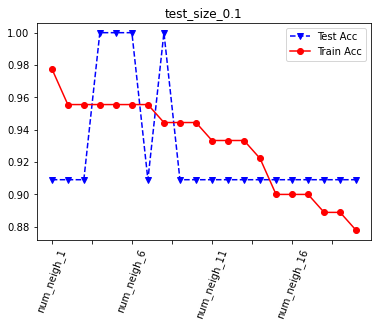

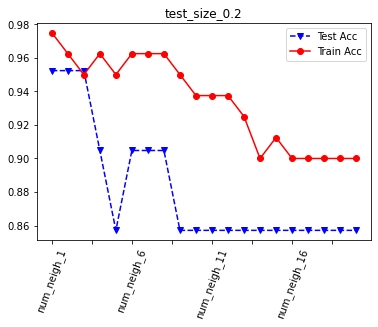

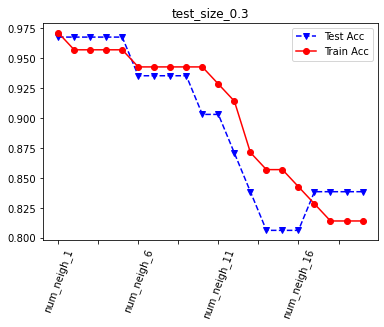

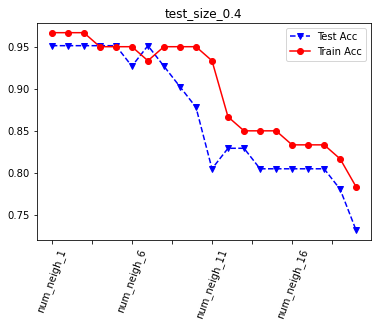

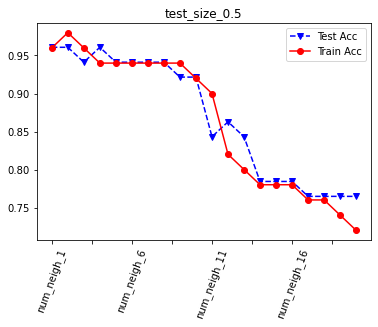

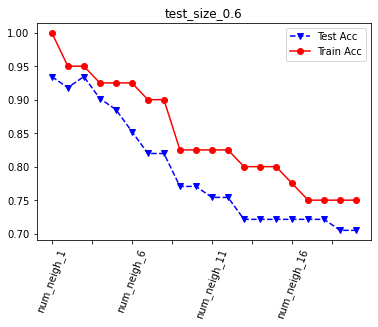

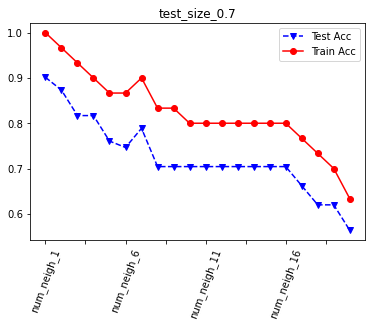

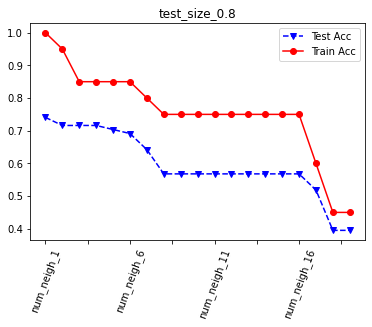

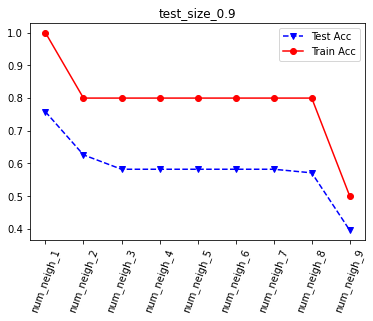

In [287]:
from sklearn.neighbors import KNeighborsClassifier
# in this case we drop legs from the X data to try and increase KNN accuracy
X, Y = read_data( drop_cols=['class', 'animal', 'type', 'legs']) #make sure x and y are clean 

# normalizing the value to be between one and zero
# X['legs'] = (X.legs-X.legs.min())/(X.legs.max()-X.legs.min())

test_sizes = [i/10 for i in range(1,10)]
numNeighbors = [i for i in range(1,21)]

train = {'test_size_{}'.format(size):{} for size in test_sizes}
test = {'test_size_{}'.format(size):{} for size in test_sizes}

for size in test_sizes: #loop through different split sizes
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y['class'], test_size=size, random_state=1)

    for k in numNeighbors: #loop through param size
        if k >= len(X_train): #check if the neighborhood size is larger than the size of the data
            train['test_size_{}'.format(size)]['num_neigh_{}'.format(k)] = np.nan
            test['test_size_{}'.format(size)]['num_neigh_{}'.format(k)] = np.nan
            continue
        # train the model usign brute force since we have a small number of obs
        clf = KNeighborsClassifier(n_neighbors=k, algorithm='brute' , metric='minkowski', p=2)
        clf.fit(X_train, Y_train)
        Y_predTrain = clf.predict(X_train)
        Y_predTest = clf.predict(X_test)
        #save the accuracy of the params
        train['test_size_{}'.format(size)]['num_neigh_{}'.format(k)] = accuracy_score(Y_train, Y_predTrain)
        test['test_size_{}'.format(size)]['num_neigh_{}'.format(k)] = accuracy_score(Y_test, Y_predTest)

# convert to dataframes
test= pd.DataFrame(test)
train = pd.DataFrame(train)

# get the max of each row and each column 
print('Most accurate parameters\n')
print(pd.concat([test.idxmax(), test.max()], axis=1).rename({0:'Num Neighbors', 1:'Accuracy'}, axis='columns'))

# plot each column 
for col in test.columns:
    fig, ax = plt.subplots()
    test[col].plot(ax=ax, label='Test Acc', style='bv--')
    train[col].plot(ax=ax, label='Train Acc', style='ro-')
    plt.legend()
    plt.xticks(rotation=70)
    plt.title(col)

In the cell above where I used the KNN algorithm to build a model there were some interesting results. I tried several different options to increase the accuracy of the model, trying different metrics like Euclidean distance as well as Manhattan distance but it appeared to me using the Minkowski distance metric provided the most accurate results. 

In addition to model parameters, I tried different variations of input data. I at first used all of the columns that don't immediately identify the class, meaning that I dropped 'class', 'animal', and 'type' from the input X data. This provided decent accuracy of around 85-88% region. I thought that this seemed a little low when compared to the other models that were used in this assignment. I went back and looked at all of the unique values for each of the columns in the data and found that 'legs' had a wider range of values than the rest of the columns. I decided to remove that column from the training data and the accuracy increased to around 96%.

After I did that, I wanted to see if normalizing the values of legs to be between 0 and 1 would allow me to get any better results. Once I normalized that column, it turned out that this impacted the model as the size of neighbors increased. At a value of one neighbor, the accuracy of the model didn't change at all, which I thought was an interesting result. 

I then wanted to see what would happen when I played around with the training vs testing splits. I created some pandas dataframes, because they make visualization easier and can be useful to get a description of the data. Of course the model will perform better at higher splits, using more of the data to train on and only reserving a small amount to test on, but I think a good compromise to get the highest accuracy while not overfitting would be the 50/50 split which gives a high accuracy but I wouldn't think that it would be overfit. 

Most accurate parameters

                  C Value  Accuracy
test_size_0.1   param = 1  1.000000
test_size_0.2  param = 10  1.000000
test_size_0.3   param = 5  0.967742
test_size_0.4   param = 5  1.000000
test_size_0.5  param = 10  0.921569
test_size_0.6   param = 5  0.836066
test_size_0.7   param = 5  0.873239
test_size_0.8   param = 5  0.765432
test_size_0.9   param = 5  0.791209


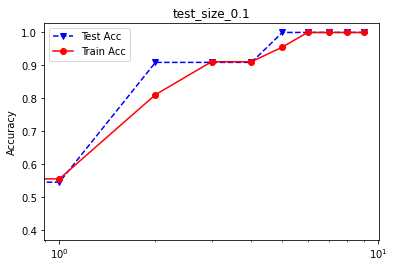

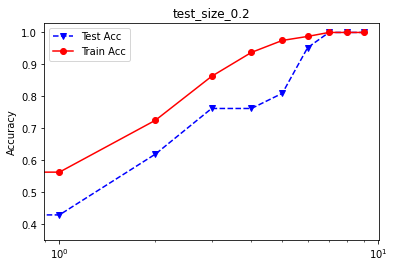

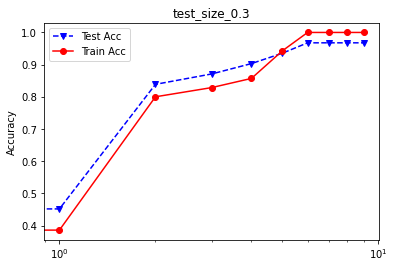

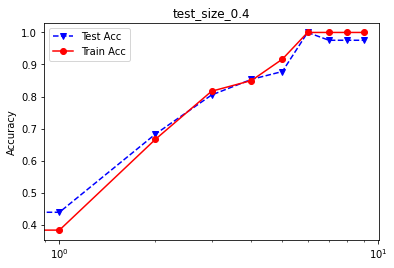

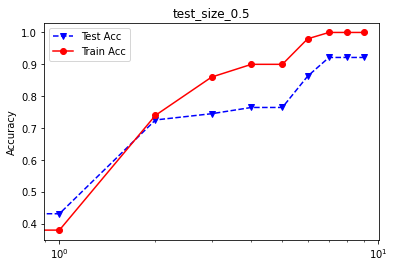

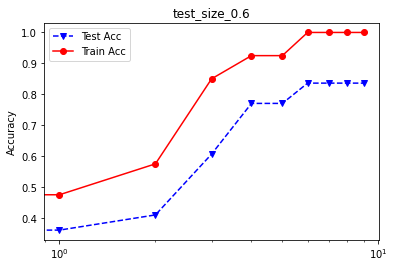

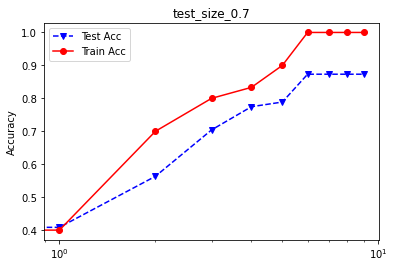

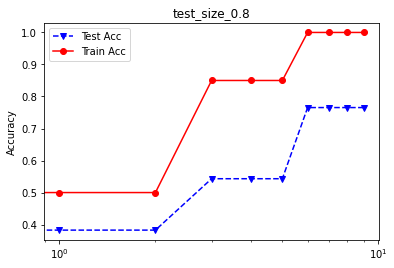

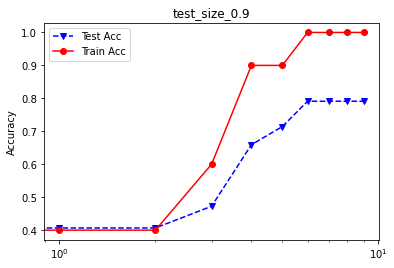

In [299]:
from sklearn.svm import SVC
X, Y = read_data() #make sure x and y are clean 

test_sizes = [i/10 for i in range(1,10)]
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

train = {'test_size_{}'.format(size):{} for size in test_sizes}
test = {'test_size_{}'.format(size):{} for size in test_sizes}

for size in test_sizes: #loop through splits
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y['class'], test_size=size, random_state=1)
    for param in C: #loop through params
        #train the model
        clf = SVC(C=param, kernel='rbf', gamma='auto')
        clf.fit(X_train, Y_train)
        Y_predTrain = clf.predict(X_train)
        Y_predTest = clf.predict(X_test)
        #save accuracy
        train['test_size_{}'.format(size)]['param = {}'.format(param)] = accuracy_score(Y_train, Y_predTrain)
        test['test_size_{}'.format(size)]['param = {}'.format(param)] = accuracy_score(Y_test, Y_predTest)

#convert to dataframes
test= pd.DataFrame(test)
train = pd.DataFrame(train)

# print max of each row and column
print('Most accurate parameters\n')
print(pd.concat([test.idxmax(), test.max()], axis=1).rename({0:'C Value', 1:'Accuracy'}, axis='columns'))

# plot each column
for col in test.columns:
    fig, ax = plt.subplots()
    test[col].plot(ax=ax, label='Test Acc', style='bv--')
    train[col].plot(ax=ax, label='Train Acc', style='ro-')
    plt.legend()
    plt.xscale('log')
    plt.title(col)
    plt.ylabel('Accuracy')

In the above cell, I use sklearns support vector machine to build a model for the given dataset. I was able to reach 100% accuracy with the model, but that is likely due to the fact that we seed the random number generator when sampling data and some of the edge cases are probably included in the training data splits. That being said, it looks like a good split for the training/testing data is somewhere around 50-70% training with the rest being reserved for testing. While training the model on higher percentages of the data will provide a higher overall accuracy, I would be concerened that there would be some degree of overfitting the model. With a good split of testing and training, the regularization parameter that performed the best throughout testing was a value of 5. Increasing this value seemed to either cause either a plateau or decline in accuracy.  

In [289]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
X, Y = read_data() #make sure x and y are clean 

numBaseClassifiers = [50,100,200,300,400,500,1000]
maxdepths = [5,10,15,20]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y['class'], test_size=.2, random_state=1)

rf_test_acc = {'max_depth_{}'.format(depth):{} for depth in maxdepths}
rf_train_acc = {'max_depth_{}'.format(depth):{} for depth in maxdepths}
bg_test_acc = {'max_depth_{}'.format(depth):{} for depth in maxdepths}
bg_train_acc = {'max_depth_{}'.format(depth):{} for depth in maxdepths}
ada_test_acc = {'max_depth_{}'.format(depth):{} for depth in maxdepths}
ada_train_acc = {'max_depth_{}'.format(depth):{} for depth in maxdepths}

for depth in maxdepths:
    for num_estimators in numBaseClassifiers: 
        #train each model and save results
        clf = ensemble.RandomForestClassifier(n_estimators=num_estimators, max_depth=depth)
        clf.fit(X_train, Y_train)
        Y_predTrain = clf.predict(X_train)
        Y_predTest = clf.predict(X_test)
        rf_train_acc['max_depth_{}'.format(depth)]['num_est_{}'.format(num_estimators)] = accuracy_score(Y_train, Y_predTrain)
        rf_test_acc['max_depth_{}'.format(depth)]['num_est_{}'.format(num_estimators)] = accuracy_score(Y_test, Y_predTest)
        

        clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=num_estimators)
        clf.fit(X_train, Y_train)
        Y_predTrain = clf.predict(X_train)
        Y_predTest = clf.predict(X_test)
        bg_train_acc['max_depth_{}'.format(depth)]['num_est_{}'.format(num_estimators)] = accuracy_score(Y_train, Y_predTrain)
        bg_test_acc['max_depth_{}'.format(depth)]['num_est_{}'.format(num_estimators)] = accuracy_score(Y_test, Y_predTest)
        
        clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=num_estimators)
        clf.fit(X_train, Y_train)
        Y_predTrain = clf.predict(X_train)
        Y_predTest = clf.predict(X_test)        
        ada_train_acc['max_depth_{}'.format(depth)]['num_est_{}'.format(num_estimators)] = accuracy_score(Y_train, Y_predTrain)
        ada_test_acc['max_depth_{}'.format(depth)]['num_est_{}'.format(num_estimators)] = accuracy_score(Y_test, Y_predTest)

# make a list that contains [test, train, name] for each model 
dfs = [[pd.DataFrame(rf_test_acc), pd.DataFrame(rf_train_acc), 'Random Forest'], [pd.DataFrame(bg_test_acc),pd.DataFrame(bg_train_acc), 'Bagging'], [pd.DataFrame(ada_test_acc), pd.DataFrame(ada_train_acc), 'ADA']]

In [201]:
# I wondered if this would be a useful metric to have, the smaller a change from training should be good
for test, train, title in dfs:
    print('Error Rates in {}'.format(title))
    print(train-test)
    print('\n')

Error Rates in Random Forest
              max_depth_5  max_depth_10  max_depth_15  max_depth_20
num_est_50       0.000000      0.019608      0.019608      0.019608
num_est_100      0.019608      0.019608      0.039216      0.019608
num_est_200      0.019608      0.019608      0.039216      0.039216
num_est_300      0.000000      0.019608      0.019608      0.000000
num_est_400      0.019608      0.039216      0.019608      0.019608
num_est_500      0.019608      0.019608      0.000000      0.039216
num_est_1000     0.019608      0.019608      0.000000      0.000000


Error Rates in Bagging
              max_depth_5  max_depth_10  max_depth_15  max_depth_20
num_est_50       0.019608      0.019608      0.019608      0.019608
num_est_100      0.019608      0.019608      0.019608      0.019608
num_est_200      0.058824      0.019608      0.019608      0.019608
num_est_300      0.019608      0.019608      0.019608      0.019608
num_est_400      0.019608      0.019608      0.019608      0.0

In [218]:
# Just an informational cell, prints the max params all pretty
print('\n')
print('='*70)
for test, train, title in dfs:
    print(title.upper().center(70,'-'),'\n')
    print('Most accurate parameters')
    print(pd.concat([test.idxmax(), test.max()], axis=1).rename({0:'Num Estimators', 1:'Accuracy'}, axis='columns'))
    print()
    print('Parameters with minimum difference from training')
    print(pd.concat([(train-test).idxmin(), (train-test).min()], axis=1).rename({0:'Num Estimators', 1:'Difference'}, axis='columns'))
    print('\n')
    print('='*70)



----------------------------RANDOM FOREST----------------------------- 

Most accurate parameters
             Num Estimators  Accuracy
max_depth_5      num_est_50       1.0
max_depth_10    num_est_300       1.0
max_depth_15    num_est_200       1.0
max_depth_20    num_est_400       1.0

Parameters with minimum difference from training
             Num Estimators  Difference
max_depth_5      num_est_50         0.0
max_depth_10    num_est_300         0.0
max_depth_15    num_est_200         0.0
max_depth_20    num_est_400         0.0


-------------------------------BAGGING-------------------------------- 

Most accurate parameters
             Num Estimators  Accuracy
max_depth_5      num_est_50  0.952381
max_depth_10     num_est_50  0.952381
max_depth_15     num_est_50  0.952381
max_depth_20     num_est_50  0.952381

Parameters with minimum difference from training
             Num Estimators  Difference
max_depth_5      num_est_50    0.047619
max_depth_10     num_est_50    0.047619


After running and looking deeper into the different ensemble methods that were provided in T5-2, I found that the the most accurate model for this dataset is the random forest model. Just to explain the process that I used to try and find the best parameters, I used an increasing number of estimators for each model in a loop to see if there would be any great increase in the model accuracy. I then use a various maximum depths to see if keeping the model more simple will be better for the final results. 

There are three cases that I would like to talk about, models trained on a small portion of the data (20%), models trained on half(50%), and models trained on large portions of data(80%). 


## Small Sized Training Set  (test_size = .8)
----------------------
**Random Forsest**
- When training a random forest model with a very small portion of the data, it turns out that keeping the model more simple, with a lower number of estimators and a lower maximum depth, performs better than a high number of estimators and deeper nodes. I think that this is likely the case because when the models are only given a small portion of data and learn as much as it can, it will be over fitted to that small portion of the whole picture. The best parameters that I found was a depth of 5 and 50 estimators. 

- max_depth_5, num_est_100, 0.753086

**Bagging**
- On a small portion of data, the bagging methods performs the best when there is a smaller number of estimators but has a deeper max depther than the random forest will. The typical winning parameters that I found was a depth of 5 and 50 estimators. 

- max_depth_5, num_est_50, 0.814815

**ADA**
- On a small set of the data, this method outperformed the other two methods by a decent percentage. However, it required a much larger number of estimators to do this, which is due to the way this algorithm works. From reading through the docs, this method is built on the decision tree but hones itself iteratively and focuses on the least classifiable data-points. I found that this method worked best with a depth of 10 and 300 estimators. 

- max_depth_10, num_est_300, 0.851852

## Medium Sized Training Set (test_size = .5)
----------------------
**Random Forest**
- This was an interesting case for the random forest, it appeared that keeping the model simple still returned accurate results. However, in this case there were multiple models that achieved 100% testing accuracy. I believe that in some cases, the training split of data includes edge cases that are not captured in the test data so the model will be more accurate. If we were to start throwing some random edge cases in like platypus or other odd balls these 100% accurate models would likely mis class it. The best parameters in this case included : (depth = 5, estimators = 50), (depth = 15, estimators = 500), (depth = 20, estimators = 300). I believe that in some of the deeper cases that the models, while attaining high accuracy may still be over-fitted.

- max_depth_5, num_est_50, 1.000000

**Bagging**
- This method, when performed on the medium sized training data produced the same accuracy for each depth of the tree and the best number of estimators was 50 for each depth. I believe that this is the case as this method builds upon itself to produce an average case. I found it interesting that the accuracy did not increase with depth size. 

- max_depth_5, num_est_50, 0.980392

**ADA**
- This method, similar to the boosting method increased in accuracy on the increased training set but was the least accurate of all the models in this case. I believe that is becuase this model still tries to prevent over-fitting like the other models. This case the number of estimators decreased. 

- max_depth_5, num_est_50, 0.960784


## Large Sized Training Set (test_size = .2)
----------------------
**Random Forest**
- In this case, I think that the random forest is likely a very accurate model as it was trained on 80% of the total observations. Still, it could be that the edge cases were included in this split of the data and the model was able to include them. 

- max_depth_5, num_est_50, 1.0

**Bagging**
- I ran this with a random split of data as well, while the accuracy decreased for the model in this run there were other runs that it reached a max of 100% accuracy. I believe that the reason that it decreased in this run is likely becuase of the randomness that is introduced into the model from the algorithm. It could also be the case that some of the edge cases were excluded from the training split. 

- max_depth_5, num_est_50, 0.952381

**ADA**
- This model also decreased in accuracy from the 50% of training split. I believe that this is also likely due to the randomness included in the algorithm and the fact that it will try to focus on the areas that the model is weak in on each iteration. I ran this again without the set seed to see if changing the splits would do anything, but this accuracy seemed to be the cap for this amount of training data. 

- max_depth_5, num_est_50, 0.952381

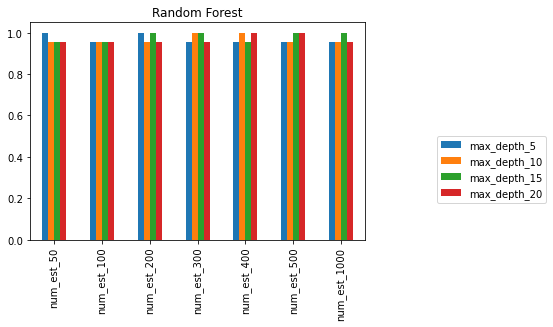

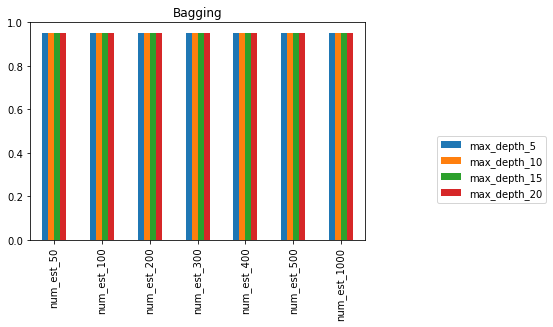

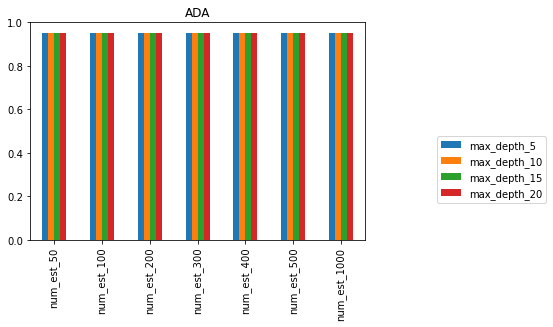

In [224]:
for test, train, title in dfs:
    test.plot.bar(title=title).legend(bbox_to_anchor=(1.2, 0.5))
